# 뇌과학을 위한 통계 (Statistics for Brain Science) 
## 1강: Hands-on Practice

This is a collection of notes and Python3 code for the hands-on portion of the Statistics for Brain Science lecture, written in Jupyter Notebook format. The example code, data, and other resources can be found in the [LCNP github repository](https://github.com/LCNP-KIST/LCNP/projects/1).

## Topics
1. Installation
    1. Jupyter Notebook
    2. Python modules
        1. `numpy`
        2. `pandas`
        3. `matplotlib`
2. Reading and printing data
    1. using `open()` and custom parsing
    2. Pandas DataFrame
    3. displaying data
3. Using matplotlib
    1. histograms
    2. scatterplots
    3. violin plot
    4. heatmaps
    

### Your first Python program

In [1]:
print("Hello World!")

Hello World!


### importing modules
Import modules by using the `import` command. We will use these three basic modules in all of our exercises.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Reading the data file and creating a DataFrame

Let's import some data! Use `!ls` to list the files in the current directory. There should be a directory called `data`.

In [5]:
!ls

data                notes               stats_neuro_1.ipynb
markdown.ipynb      stats_neuro_1.html  stats_neuro_2.ipynb


In [6]:
!ls data

Neuroscience_exam.txt


Let's read the data by using the `open` function. Then, we will read the file one line at a time and print each line.

In [7]:
fil = open("data/Neuroscience_exam.txt")
for line in fil:
    print(line)
fil.close()

# Neuroscience 101 final exam statistics from 2010 to 2020

# year    semester     number_of_students      average_score

2014    2   30  69.9

2015    1   50  83.2

2015    2   45  79.4

2016    1   62  72.9

2016    2   44  80.0

2017    1   58  77.7

2017    2   50  89.5

2018    1   60  68.0

2018    2   32  91.1

2019    1   64  64.9

2019    2   43  78.8

2020    1   62  85.4



The data structure of the file is year, semester, number of students, and average score. Let's read each line and store the data into Python data structures. We will have to ignore the lines that start with the symbol `#`, as they are not part of the actual data. We will create 4 lists, which are flexible array-like structures in Python that we can add elements to with the `append` function.

In [8]:
#first, create 4 empty lists
year_list = []
sem_list = []
num_list = []
score_list = []

#now read the file and append the data to the respective list
fil = open("data/Neuroscience_exam.txt")
for line in fil:
    if line[0]=='#': continue   # if the first character of the line is a number sign, skip the line.
    line_data = line.split()
    year = int(line_data[0])
    semester = int(line_data[1])
    num_students = int(line_data[2])
    ave_score = float(line_data[3])
    
    # add each data to the end of each list
    year_list.append(year)
    sem_list.append(semester)
    num_list.append(num_students)
    score_list.append(ave_score)

    

Let's check our lists by printing them.

In [9]:
print(year_list,sem_list,num_list,score_list)

[2014, 2015, 2015, 2016, 2016, 2017, 2017, 2018, 2018, 2019, 2019, 2020] [2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1] [30, 50, 45, 62, 44, 58, 50, 60, 32, 64, 43, 62] [69.9, 83.2, 79.4, 72.9, 80.0, 77.7, 89.5, 68.0, 91.1, 64.9, 78.8, 85.4]


Then let's change the lists into numpy arrays.

In [10]:
years = np.array(year_list)
semesters = np.array(sem_list)
student_numbers = np.array(num_list)
scores = np.array(score_list)

Next, let's create a Pandas DataFrame structure with the lists we have compiled.

In [11]:
neurosci_dat = {'year': years, 'semester': semesters, 'student_num': student_numbers, 'scores':scores}


In [12]:
neuro_dat = pd.DataFrame(data = neurosci_dat)

Try printing the DataFrame.

In [13]:
neuro_dat

,year,semester,student_num,scores
0,2014,2,30,69.9
1,2015,1,50,83.2
2,2015,2,45,79.4
3,2016,1,62,72.9
4,2016,2,44,80.0
5,2017,1,58,77.7
6,2017,2,50,89.5
7,2018,1,60,68.0
8,2018,2,32,91.1
9,2019,1,64,64.9


You can print out each column individually.

In [14]:
print(neuro_dat.scores)

0     69.9
1     83.2
2     79.4
3     72.9
4     80.0
5     77.7
6     89.5
7     68.0
8     91.1
9     64.9
10    78.8
11    85.4
Name: scores, dtype: float64


How many data points do we have? We can check easily by using the `index` attribute of the DataFrame object, which is a range of integers. To count the total number of datapoints, we check the length of the `index` attribute by using `len()`. Let's save that number as `N` for future use.

In [15]:
N = len(neuro_dat.index)
print(N)

12


## Some simple statistics

Let's answer the following questions from the data:
1. What is the total number of students who have taken Neuroscience 101 since 2015?
2. What is the average final exam score over all semesters?
3. Is there some correlation between the number of students in a class and the average final exam score?

In [16]:
print("The total number of students is:",np.sum(student_numbers))

The total number of students is: 600


There is a simple `numpy` function that we can use to compute the mean. We simply give the `mean` function of the `numpy` module the array we want to compute the mean of. As a reminder, the mean is defined as
$$ \bar{x} = \frac{\sum_i x_i}{N}$$

In [17]:
print("The mean of the scores is :", np.mean(neuro_dat.scores))

The mean of the scores is : 78.39999999999999


However, we have neglected the fact that each semester had a different number of students. In order to find the true average over all semesters, we will have to compute a weighted mean:

$$\bar{x} = \frac{\sum_i w_i x_i }{\sum_i w_i}$$

In [18]:
wsum = np.sum(student_numbers * scores)/np.sum(student_numbers)
print("The average score over all semesters is:",wsum)
np.average(scores)

The average score over all semesters is: 77.80566666666667


78.39999999999999

Next, we want to check if there is any correlation between the number of students in a class and the average final exam score. `numpy` has a function `corrcoef` which computes a correlation matrix.

In [19]:
Rij = np.corrcoef(student_numbers,scores)
print(Rij)

[[ 1.         -0.33741898]
 [-0.33741898  1.        ]]


This shows that the Pearson's correlation between the the student number and the score is $\approx -0.33$, indicating a small degree of negative correlation.

## Data visualization

Let's visualize the data using histograms.

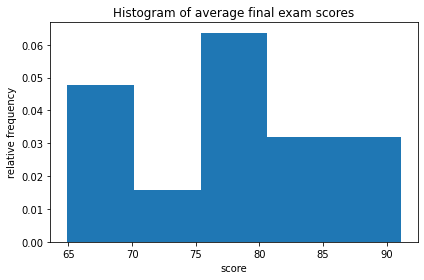

In [21]:
num_bins = 5

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(neuro_dat.scores, num_bins, density=1)

# add a 'best fit' line
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
ax.set_title('Histogram of average final exam scores')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

We want to check the separate distributions for 1st semester classes and 2nd semester classes.

In [22]:
sem1 = neuro_dat.loc[neuro_dat.semester ==1]
sem2 = neuro_dat.loc[neuro_dat.semester ==2]

In [23]:
sem1

,year,semester,student_num,scores
1,2015,1,50,83.2
3,2016,1,62,72.9
5,2017,1,58,77.7
7,2018,1,60,68.0
9,2019,1,64,64.9
11,2020,1,62,85.4


In [24]:
sem2

,year,semester,student_num,scores
0,2014,2,30,69.9
2,2015,2,45,79.4
4,2016,2,44,80.0
6,2017,2,50,89.5
8,2018,2,32,91.1
10,2019,2,43,78.8


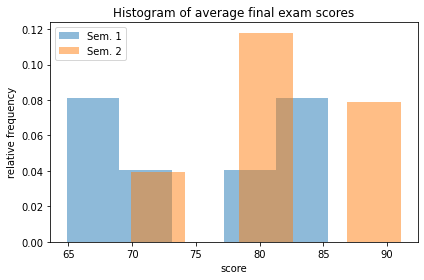

In [25]:
num_bins = 5

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(sem1.scores, num_bins, alpha=0.5, label="Sem. 1",density=1)
n, bins, patches = ax.hist(sem2.scores, num_bins, alpha=0.5, label="Sem. 2", density=1)
# add a 'best fit' line
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
ax.set_title('Histogram of average final exam scores')
plt.legend(loc='upper left')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

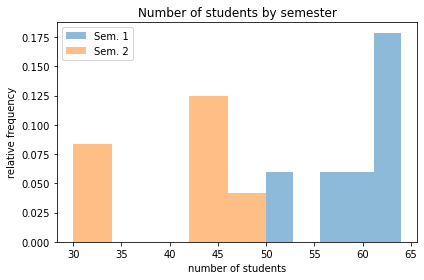

In [26]:
num_bins = 5

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(sem1.student_num, num_bins, alpha=0.5, label = 'Sem. 1',density=1)
n, bins, patches = ax.hist(sem2.student_num, num_bins, alpha=0.5, label = 'Sem. 2', density=1)
# add a 'best fit' line

ax.set_xlabel('number of students')
ax.set_ylabel('relative frequency')
ax.set_title('Number of students by semester')
plt.legend(loc='upper left')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

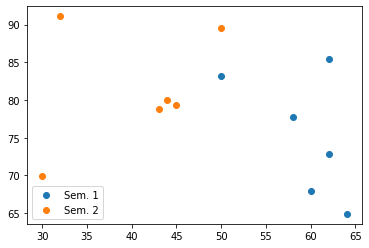

In [27]:
plt.scatter(sem1.student_num,sem1.scores, label="Sem. 1")
plt.scatter(sem2.student_num,sem2.scores, label="Sem. 2")
plt.legend(loc='lower left')
plt.show()

## Other types of plots
### violin plots

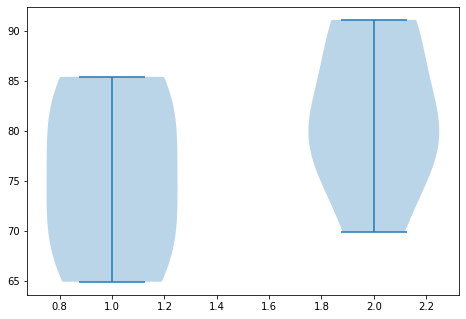

In [32]:
np.random.seed(10)
collectn_1 = [itm for itm in sem1.scores]
collectn_2 = [itm for itm in sem2.scores]

## combine these different collections into a list
data_to_plot = [collectn_1, collectn_2]

# Create a figure instance
fig = plt.figure()

# Create an axes instance
ax = fig.add_axes([0,0,1,1])

# Create the boxplot
bp = ax.violinplot(data_to_plot)
plt.show()

### Heatmaps

[[83.2, 72.9, 77.7, 68.0, 64.9, 85.4], [69.9, 79.4, 80.0, 89.5, 91.1, 78.8]]


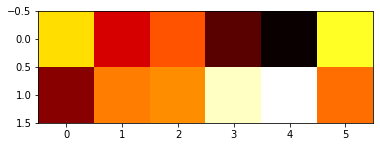

In [33]:
a = [[itm for itm in sem1.scores],[itm for itm in sem2.scores]]
print(a)
plt.imshow(a, cmap='hot')
plt.show()

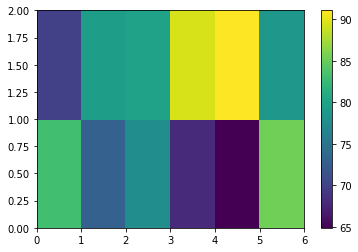

In [34]:
a = [[itm for itm in sem1.scores],[itm for itm in sem2.scores]]
heatmap=plt.pcolor(a)
plt.colorbar(heatmap)
plt.show()

## (extras)

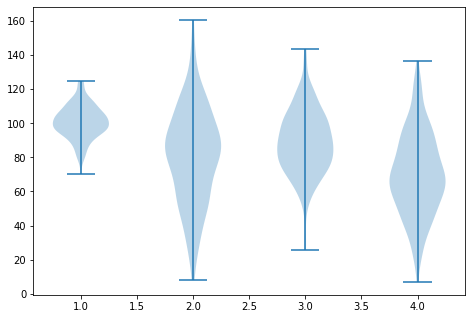

In [35]:
np.random.seed(10)
collectn_1 = np.random.normal(100, 10, 200)
collectn_2 = np.random.normal(80, 30, 200)
collectn_3 = np.random.normal(90, 20, 200)
collectn_4 = np.random.normal(70, 25, 200)

## combine these different collections into a list
data_to_plot = [collectn_1, collectn_2, collectn_3, collectn_4]

# Create a figure instance
fig = plt.figure()

# Create an axes instance
ax = fig.add_axes([0,0,1,1])

# Create the boxplot
bp = ax.violinplot(data_to_plot)
plt.show()

In [28]:
x = neuro_dat.student_num
y = neuro_dat.scores
model = np.polyfit(x,y,1)  #fit to linear equation

In [29]:
predict = np.poly1d(model)

In [30]:
from sklearn.metrics import r2_score
r2_score(y,predict(x))

0.11385156585211897

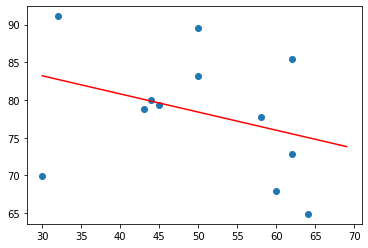

In [31]:
x_lin_reg = np.arange(30,70,1)
y_lin_reg = predict(x_lin_reg)
plt.scatter(x,y)
plt.plot(x_lin_reg, y_lin_reg, c = 'r')
plt.show()